# How to use Jupyter with Python3 *and* R (via `rpy2`)

In [4]:
pythonVariable = 1+(2*46456)

Latex' math notation is supported: $a_1 = a_2 \cdot a_3^{a_4}$

In [5]:
print(pythonVariable - 134)

92779


# Connect Python with R

There are so-called 'magic' commands (escaped via `%`) that allow to use more advanced features. Per default, execution via `%R` is not supported, as can be seen when listing the supported commands:

In [6]:
% lsmagic

Available line magics:
%R  %Rdevice  %Rget  %Rpull  %Rpush  %alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%R  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%p

To change this, run `conda ìnstall -c r rpy2` (or `pip install rpy2`, if you are not using Anaconda)

In [7]:
# This should work if rpy2 has been installed succesfully:
import rpy2.interactive as r

Now we can load the `rpy2.ipython` extension to make this work (the `rmagic` extension described [here](https://blog.dominodatalab.com/lesser-known-ways-of-using-notebooks/) is outdated, but the rest of the post is still valid).

In [8]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


When running `lsmagic`, we should now be able to see support for `%%R`, `%R`, and so on (careful, the list is not sorted alphabetically, better use `Ctrl+F` :).

In [9]:
% lsmagic

Available line magics:
%R  %Rdevice  %Rget  %Rpull  %Rpush  %alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%R  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%p

Now, we can run single lines of R code like this:

In [10]:
%R x <- 1 + 2 + 3

array([ 6.])

In [11]:
%%R
x <- runif(10)
y <- runif(10)

Let's try a more complete [example](https://github.com/IRkernel/IRkernel/blob/master/example-notebooks/Demo.ipynb):

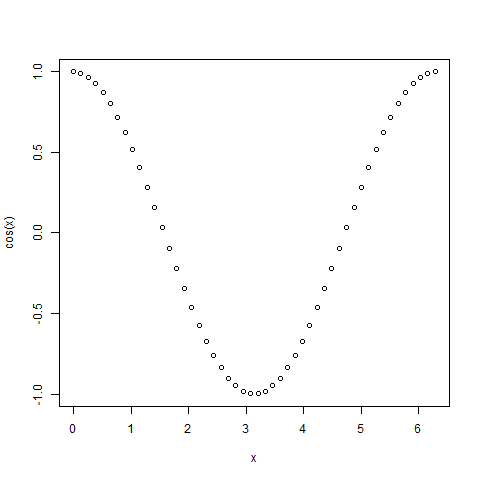

In [12]:
%%R
x <- seq(0, 2*pi, length.out=50)
plot(x, cos(x))

## Combining Pyhton and R

In [13]:
%Rpush pythonVariable

In [14]:
%%R
rVariable <- pythonVariable + 123

In [15]:
%Rpull rVariable

In [34]:
print("test ", rVariable[0])

test  93036.0


## Widgets

In [91]:
%matplotlib notebook
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt

t = np.arange(0.,1.0,.1)
def testplot(x):
    plt.plot(t, t, 'r--', x, x**2, 'bs', x, x**3, 'g^')

<IPython.core.display.Javascript object>


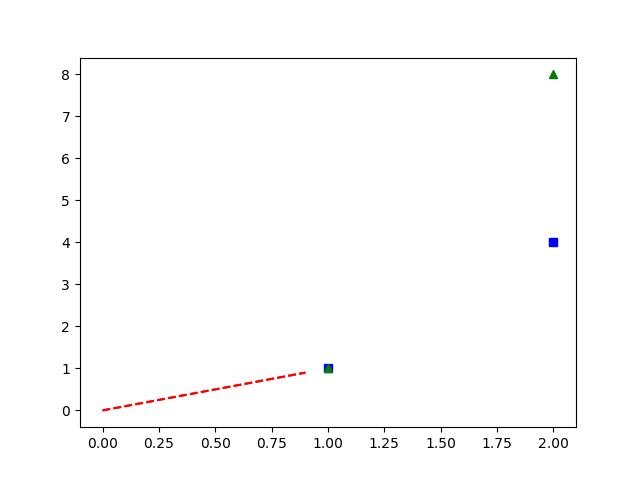

In [92]:
widgets.interact(testplot, x=(1,10,1))